In [1]:
# import the required libraries 
# for analytics purpose: Numpy, Pandas
# for visualization: matplotlib, seaborn
# for Machine Learning: scikit-learn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processin
import matplotlib.pyplot as plt # visulization
import seaborn as sns # visulization
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
%matplotlib inline

# Read the input file. 
To download the file from Kaggle: https://www.kaggle.com/datasets/atulmittal199174/credit-risk-analysis-for-extending-bank-loans?resource=download 

In [3]:
df = pd.read_csv('./bankloans.csv')
df.head()


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


In [5]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [7]:
#df.value_counts()
# removing the rows with null 
df = df.dropna()

<AxesSubplot:xlabel='age', ylabel='income'>

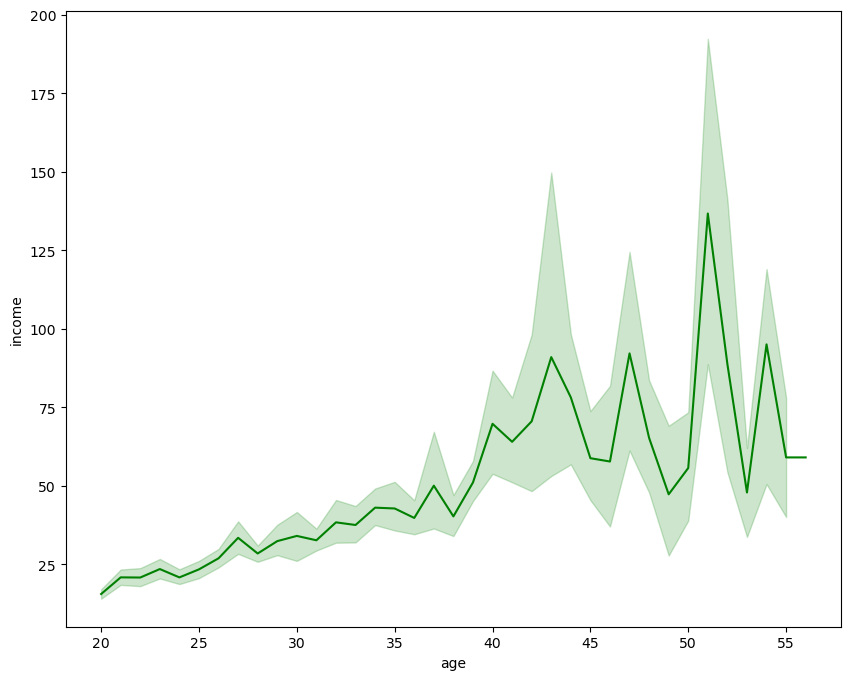

In [13]:
# creating Viz to explore the sample
fig,ax = plt.subplots(figsize=(10,8))
sns.lineplot(x='age',y='income',data=df,ax=ax, color='g')


In [14]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [16]:
# creating features/independant array (x) and dependant parameter (y)
x=df.drop(['default'],axis=1)
y=df['default']

In [17]:
# split the sample for training and test purpose
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
# scaling the features
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

# ML Models 

Model 1) Random Forest

In [20]:
rfc = RandomForestClassifier(n_estimators=200)

In [21]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [22]:
rfc.score(xtest,ytest)

0.7928571428571428

In [24]:
rfc2 = cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)
rfc2.mean()

# mean acuraccy using Random Forest=0.78

0.7785714285714285

Model 2) Support Vector Machine

In [25]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [26]:
sv.score(xtest,ytest)

0.7928571428571428

In [28]:
# finding best parameters for SVM
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [32]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [33]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [34]:
svm_best = SVC(C=0.1,gamma=0.1,kernel='linear')
svm_best.fit(xtrain, ytrain)
svm_best.score(xtest, ytest)


0.8214285714285714

Model 3) Logistic Regression

In [35]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8357142857142857

<AxesSubplot:>

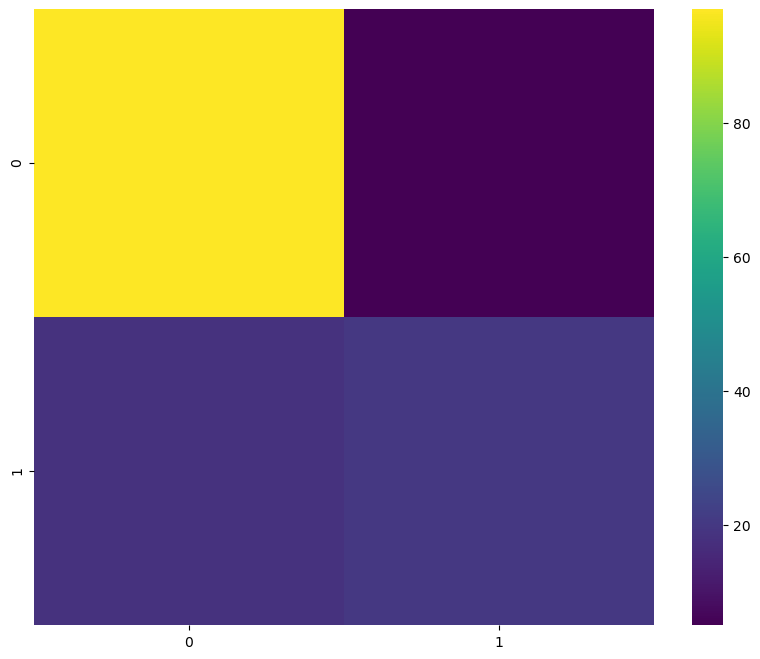

In [39]:
y_predict = lr.predict(xtest)
c= confusion_matrix(ytest,y_predict)
fig ,ax = plt.subplots(figsize=(10,8))
sns.heatmap(c,ax=ax, cmap='viridis')

In [40]:
Using a dataset with 700 rows and columns of customer information including whether they have been defaulter in the past (1) or not (0)
we created ML models that could predict the risk credit for new customers.   
The Logistic Regression model provides us with the highest accuracy and as we see in confusion matrix, the model does a good job
in predicting true positives or non-defaulter customer which we can trust on giving the loan. However, as we can see the true negative cell
is not that bright which shows that we may predict 

SyntaxError: invalid syntax (1164693465.py, line 1)